# Correlation in Python 

In [287]:
# Import libraries. 

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjusts the configuration of the plotes that will be created

# Alex copy-and-pasted the Python code into this cell. I suspect that I'll be doing the same
# in the future. For this time, I manually typed out the code and did my bset to understand
# what any of the code means. 

# Alex says that the aliases for the packages are widely used, 
# so it helps to become familiar with them here

# Read in the data
df = pd.read_csv(r'C:\Users\Brian\Documents\Alex The Analyst\Data Analyst Portfolio Project\Correlation in Python (Project 4 of 4)\movies - Copy for Practice.csv')

In [288]:
# Import an additional package for ANOVA further down the file. 
# Source = Google's AI Overview for the query "how to perform anova in pandas python"

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [289]:
# Remove the maximum number of rows early on. 
pd.set_option('display.max_rows', None)

# It looks like for my copy of Jupyter Notebook, I have to manually configure cells to "Enable Scrolling for Outputs." 
# On a cell-by-cell basis, I right-click a cell and select "Enable Scrolling for Outputs." For the entire notebook, 
# I have to select all cells, right-click one of the selected cells, and then select "Enable Scrolling for Outputs."
# Same process goes for disabling scrolling for outputs. 
# So far, I don't know how to configure scrollilng for outputs for the entire notebook by default. 
# Source = Google's AI Overview which I'm not sure how to reference 
# (query used = "how to automatically enable scrolling for outputs in jupyter notebook")

In [290]:
# Look at some of the imported data. 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [291]:
# Note: My output differs from Alex's. My guess is that the dataset on kaggle might've been updated 
# since the time Alex had uploaded his tutorial to YouTube. Nevertheless, I'll do my best 
# to follow along as close as possible and take note of any discrepancies as applicable. 

In [292]:
# look for any missing data. 
for column in df.columns:
    percent_missing = np.mean(df[column].isnull())
    print('{} - {}%'.format(column, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [293]:
# Again, my output looks different from Alex's output. Alex goes forward with no null values in his dataset. 
# However, becuase my dataset does in fact have some null values, I'll most likely have to make some 
# special accommodations in order for my output to look somewhat sensible, even if it won't match Alex's 
# output exactly. 

In [294]:
# look at the data types. 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [295]:
# Copy the original dataframe in order to preserve the original dataframe, 
# and then change the data type for 'budget" and 'gross' from float64 to int64 
# in order to remove the ".0" from the value. 

# Because my data does indeed have null values, I'll try to 
# change data types only for non-null values in the 'budget' column. 

# Note: In order for the type conversion to work, 'Int64' needs to be used
# and NOT 'int64' like what Alex uses in his video because using 'int64'
# raises an error (at least for me). 
# Some information on Int64 can be found here = https://pandas.pydata.org/docs/user_guide/integer_na.html

df_copy_1 = df
df_copy_1['budget'] = df_copy_1['budget'].astype('Int64')
df_copy_1['gross'] = df_copy_1['gross'].astype('Int64')

In [296]:
# Check out some of the dataframe to confirm that the changes had been properly applied. 
df_copy_1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [297]:
# Create a column for the correct year of movie release. 

# Note: My 'released' column is formatted differently from Alex's, so I'll have to come up with
# my own code in order to create the 'year_correct' as intended. 

# Split the 'released' data along the spaces (' '). 
df_copy_1[['release_month', 'release_day', 'release_year', 'release_country']] = df_copy_1['released'].str.split(' ', n=3, expand=True)

# Split the 'release_day' data along the comma (','). 
df_copy_1[['1', '2']] = df_copy_1['release_day'].str.split(',', expand=True)

# Save the numerical day value to the 'release_day' column. 
df_copy_1['release_day'] = df_copy_1['1']

# Drop the unneeded columns. 
df_copy_1 = df_copy_1.drop(columns = ['1', '2'])

# Split the 'release_country' data along the open parentheses ('('). 
df_copy_1[['1', '2']] = df_copy_1['release_country'].str.split('(', n=1, expand=True)

# Split the '2' data along the close parentheses (')'). 
df_copy_1[['3', '4']] = df_copy_1['2'].str.split(')', n=1, expand=True)

# Save the country of release to the 'release_country' column. 
df_copy_1['release_country'] = df_copy_1['3']

# Drop the unneeded columns. 
df_copy_1 = df_copy_1.drop(columns = ['1', '2', '3', '4'])

# Look at some of the most recent dataframe. 
df_copy_1.head()

# Note: In order for the string splits to take place, the entire Jupyter notebook might have to be run from the top. This might be
# because of how the dataframe is being held in RAM, and how rerunning a cell can attempt to apply changes to an already changed object
# instead of applying new changes to the object prior to having applied old changes to it. (This probobably would make a lot more sense 
# if I had a diagram.) 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_month,release_day,release_year,release_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June,13,1980,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July,2,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June,20,1980,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July,2,1980,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July,25,1980,United States


In [298]:
# Sort the dataframe by 'gross' in descending order and then look at some of the dataframe again. 
df_copy_1.sort_values(by = ['gross'], inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_month,release_day,release_year,release_country
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,December,18,2009,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,April,26,2019,United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,December,19,1997,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,December,18,2015,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,April,27,2018,United States


In [299]:
# The output might take a bit longer to come up because of the number of rows that are being dislayed. 
df_copy_1 = df_copy_1.sort_values(by = ['gross'], inplace = False, ascending = False)
df_copy_1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_month,release_day,release_year,release_country
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,December,18,2009,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,April,26,2019,United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,December,19,1997,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,December,18,2015,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,April,27,2018,United States


In [300]:
# Drop any duplicates and then look at some of the result
# in order to confirm that things are going well. 
df_copy_1['company'].drop_duplicates().sort_values(ascending = False).head()

# This line of code doesn't necessarily drop duplicates from the dataframe. Instead, it shows all of the unique
# film company names. In order actually drop duplicates from the 'company' column, I'd have to use the following line of code: 
# df_copy_1['company'] = df_copy_1['company'].drop_duplicates()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

In [301]:
# Alex points out that looking at all unique values in a particular column
# instead of just the top few rows can help with identifying any data quality issues. For example, 
# in his dataset as well as mine, there are different companies each with the name "Walt Disney." 
# Alex says that he did some investigating, and it turns out that 
# each of the variations was the name of a legitimate company at different times in the past. 
# However, there can be times when slight variations in a name, like an "s" at the end of a word, 
# can warrant data cleaning. 

# Note: In order to make the file size small enough to upload to GitHub or to convert to a .pdf file using
# an online converter, I'm deliberately using the head() function to limit the number of rows
# in any of the dataframe displays. 

In [302]:
# I'll take the initiatve to try to remove duplicates from my dataset
# since my dataset is different from Alex's in the video. 
df_copy_1 = df_copy_1.drop_duplicates()
df_copy_1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_month,release_day,release_year,release_country
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,December,18,2009,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,April,26,2019,United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,December,19,1997,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,December,18,2015,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,April,27,2018,United States


In [303]:
# Note: The horizontal scroll bar for these cells that have been configured for scrolling seems to only show up 
# (at least for me) if the vertical scroll bar is scrolled down to the bottom. This might be a quirk of my own computer, 
# or it may be something that occurs with other machines as well. 

In [304]:
# Alex figures that there's a high correlation with gross revenue. He also figures that
# the company itself will also have a high correlation with gross revenue. 
# He'll then run some calculations to determine if his guesses are correct. 
# (And to be real, I can see how this "guess-and-verify" approach can be a thing
# when analyzing datasets. Plus, I apprecate that he's recording what his guesses are in advance; 
# this to me demonstrates accountability.) 

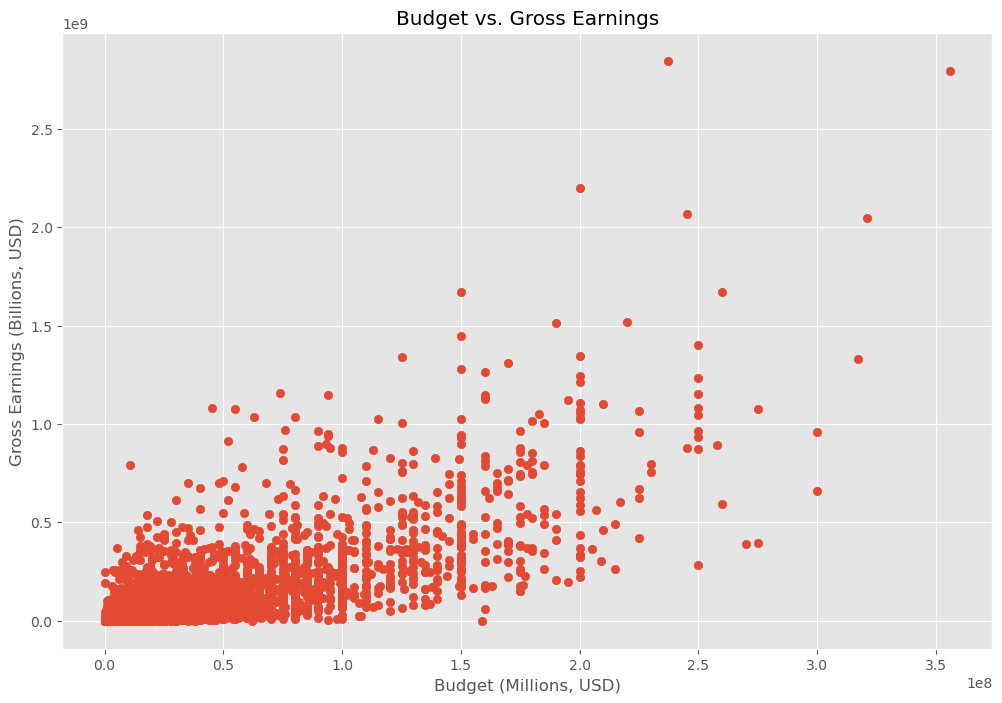

In [305]:
# Build a scatterplot with 'budget' vs. 'gross'. 
plt.scatter(x = df_copy_1['budget'], y = df_copy_1['gross'])

# Apply some labels to the scatterplot. 
plt.title('Budget vs. Gross Earnings') 
plt.xlabel('Budget (Millions, USD)')
plt.ylabel('Gross Earnings (Billions, USD)')

# Note: Alex switches the labels for his x-axis and y-axis. Also, 
# I've added more detail to my axis labels for better clarity. 

plt.show()

In [306]:
# Review some of the dataframe in order to try to make sense of the data points in the scatterplot. 
df_copy_1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_month,release_day,release_year,release_country
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,December,18,2009,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,April,26,2019,United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,December,19,1997,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,December,18,2015,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,April,27,2018,United States


<Axes: xlabel='budget', ylabel='gross'>

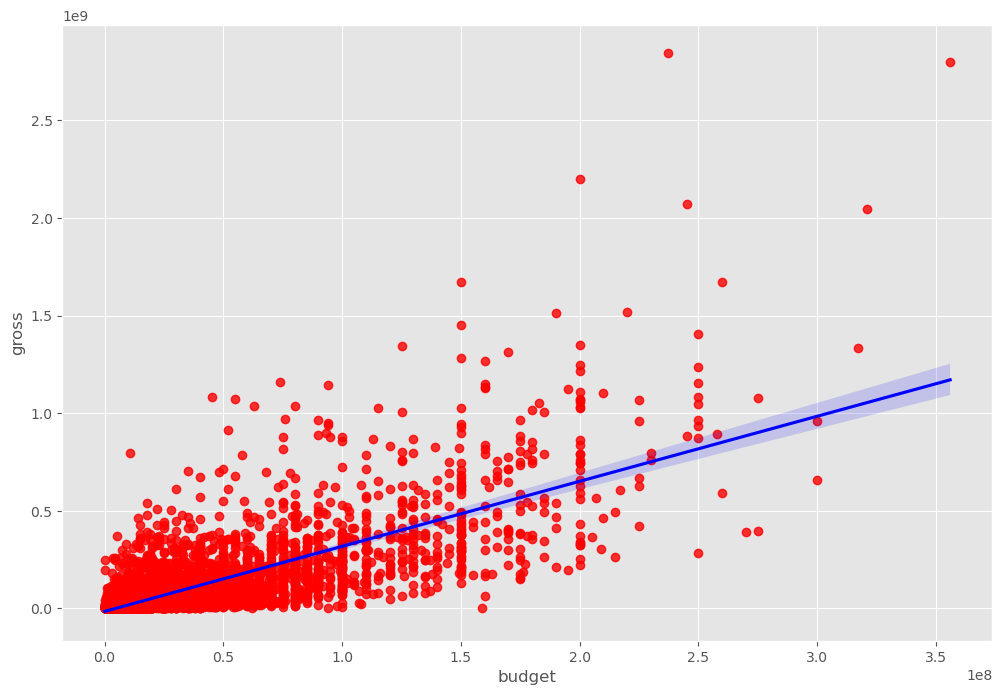

In [307]:
# Plot budget vs. gross using Seaborn. 
sns.regplot(x = 'budget', y = 'gross', data = df_copy_1, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})

# Colors have been explicitly selected for the plot to make it easier to identify the line in the scatterplot. 

In [308]:
# Look at correlation within the dataframe. 
df_copy_1.corr(numeric_only = True)

# Alex didn't need to pass arguments into his corr() function, 
# but I needed to do so in order to avoid an error message. 
# Source explaining how to calculate correlations with just numeric values 
# in the dataframe = https://stackoverflow.com/questions/76533178/corr-results-in-valueerror-could-not-convert-string-to-float

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [309]:
# Alex explains some types of correlation - Pearson, Kendall, and Spearman. 

# Source that compaares 
# all three methods = https://ishanjainoffical.medium.com/choosing-the-right-correlation-pearson-vs-spearman-vs-kendalls-tau-02dc7d7dd01d

# By default, the corr() function uses Pearson, but for good measure
# I'll explicitly select the Pearson method in order to avoid
# any ambiguity or confusion. 

In [310]:
# Conclusion: It looks like there is a moderate to strong positive correlation between 'budget' and 'gross' with the Pearson method. 
# Source on how to interpret correlation coefficients = https://statisticsbyjim.com/basics/correlations/

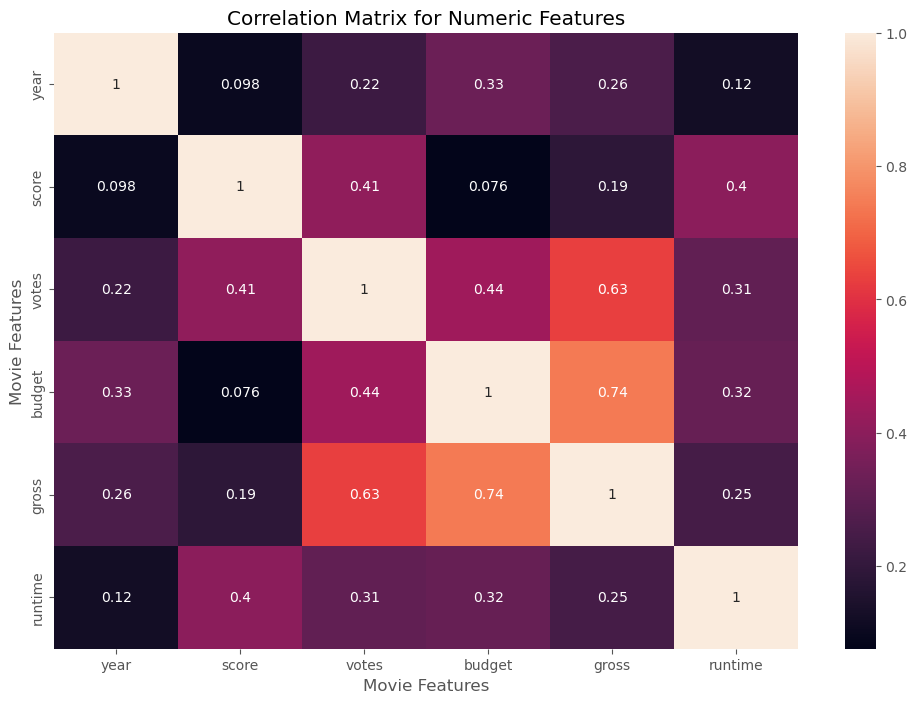

In [311]:
# Visualize the correlation matrix of Pearson coefficients as a heatmap. 
correlation_matrix = df_copy_1.corr(numeric_only = True, method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)

# Apply some labels to the heatmap. 
plt.title('Correlation Matrix for Numeric Features') 
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [312]:
# Look at the correlation between 'company' and 'gross'. 

# Here, I'll deviate from what Alex does in the video. The column 'company' contains qualitative data while 'gross' contains
# numerical data, and a person on the comments section of the video mentions that either a T-test or an ANOVA 
# would be appropriate here. I did some further investigation, and it looks like ANOVA is the way to go. 
# Source on finding correlations between quantitative 
# and qualitative data = https://www.quora.com/How-can-I-measure-the-correlation-between-continuous-and-categorical-variables

In [313]:
# Isolate just 'company' and 'gross', and then drop any NAs. 
df_copy_2 = df_copy_1[['company', 'gross']].dropna()

# Confirm that missing data in this new dataframe have been properly dropped. 
for column in df_copy_2.columns:
    percent_missing = np.mean(df_copy_2[column].isnull())
    print('{} - {}%'.format(column, percent_missing))

company - 0.0%
gross - 0.0%


In [314]:
# Define the ANOVA model. 
model = ols(formula = 'gross ~ C(company)', data = df_copy_2).fit()
# Source = Google's AI Overview for the query "how to perform anova in pandas python"
# Source on how to handle 
# missing data = https://stackoverflow.com/questions/22234589/ignoring-missing-values-in-multiple-ols-regression-with-statsmodels

# Note: Instructing the ols() function to drop missing values wasn't working for me, so I had to explicitly create
# a new dataframe that has NAs dropped. 

# As I understand it, an ANOVA is a hypothesis test, and in this case where a one-way ANOVA is being used, I'm trying to figure out
# if the company name has an impact on the gross earnings for a movie. The null hypothesis is that the company name has NO 
# impact on gross earnings, and the alternative hypothesis is that the company names DOES have an impact on gross earnings. 
# The significance level, or alpha, will be set to 0.05. If alpha is set to 0.10, then the threshold for rejecting the 
# null hypothesis is lower, thus prompting a potential type 1 error, or a false positive. If alpha is set to 0.01, 
# the threshold for rejecting the null hypothesis becomes higher, thus prompting a potential type 2 error, or a flase negative. 

In [315]:
# Perform the ANOVA. 
anova_table = sm.stats.anova_lm(model, type=1)

# Type 1 (sequential sum of squares) is the default type used for analysis of variance in R, and since there's only one 
# independent variable here, it gets calculated first. 
# Source = Google's AI Overview for the query "is one way anova type 1 2 or 3"
# Source = https://www.r-bloggers.com/2011/03/anova-%E2%80%93-type-iiiiii-ss-explained/

In [316]:
# Print the ANOVA table. 
print(anova_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(company)  2275.0  7.493652e+19  3.293913e+16  1.311855  4.082590e-15
Residual    5193.0  1.303901e+20  2.510882e+16       NaN           NaN


In [317]:
# Based off of the above ANOVA table, the F-statistic for 'company' is 1.311855. That number is based off of
# the data fed into the anova_lm() function. Moreover, the p-value, or PR(>F) for 'company' is 4.082590e-15, which is 
# the probabilty of getting the F-statistic assuming that the null hypothesis is valid. That probabily it incredibly small, 
# far smaller than the alpha what was set at 0.05, so the null hypothesis is rejected. 

# Conclusion: The company name does have a significant influence on the gross earnings for a movie. 

# Source = Google's AI Overview for the query "how to interpret an anova table in python"
# Source on F-tests in one-way ANOVA = https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Introductory_Statistics_(Shafer_and_Zhang)/11%3A_Chi-Square_Tests_and_F-Tests/11.04%3A_F-Tests_in_One-Way_ANOVA